In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,The Impossible Years,1968
1,Bad Girl (II),2016
2,Still,2017
3,Sapho,1934
4,As I Die Slowly,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

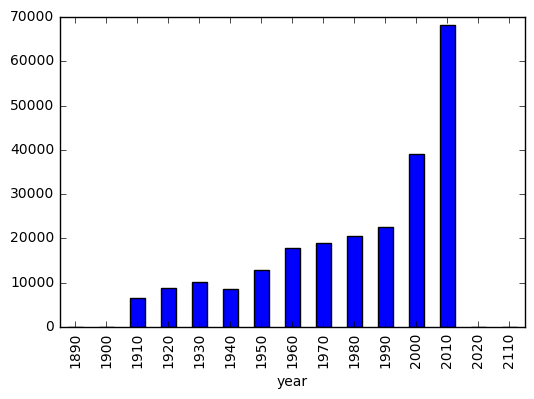

In [11]:
t = titles.groupby(titles.year // 10 * 10).size()
t.plot(kind = 'bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

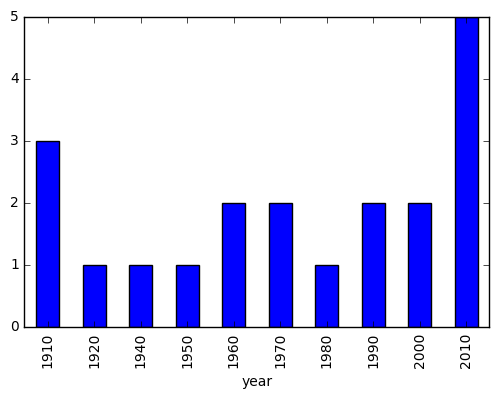

In [17]:
t = titles[titles.title == 'Hamlet']
t.groupby(t.year//10 * 10).size().plot(kind = 'bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

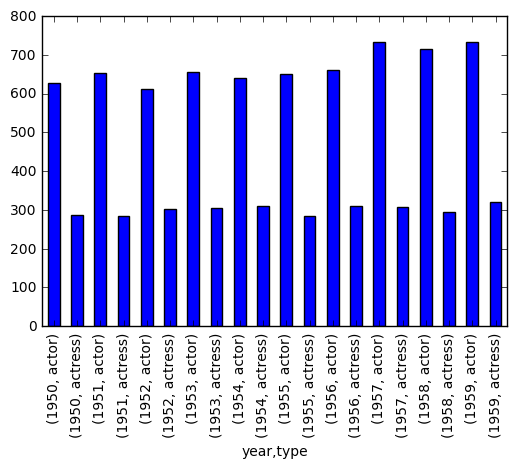

In [27]:
c = cast[(cast.year//10 == 195) & (cast.n == 1)].groupby(['year','type']).size()
c.plot(kind = 'bar')

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

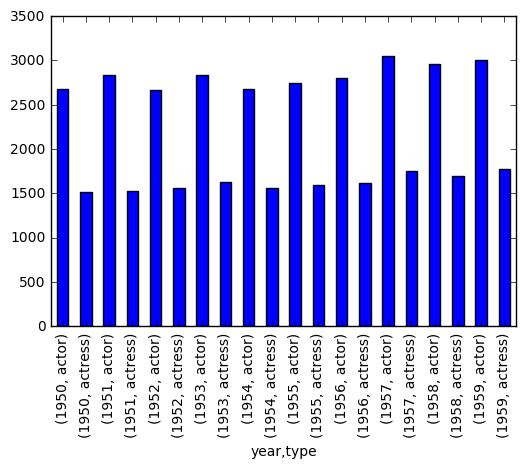

In [28]:
c = cast[(cast.year//10 == 195) & (cast.n >= 1) & (cast.n<= 5)].groupby(['year','type']).size()
c.plot(kind = 'bar')

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [30]:
c = cast[cast.title == 'The Pink Panther']
c.groupby('year').size()

year
1963    21
2006    90
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [41]:
c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['year', 'title']).size()
g[g > 1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [42]:
c = cast
c = c[c.name == 'Frank Oz']
g = c.groupby(['character']).size()
g[g > 1].order()

C:\Users\Vaibhav\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: order is deprecated, use sort_values(...)


character
Grover            2
Bert              3
Cookie Monster    4
Fozzie Bear       4
Sam the Eagle     5
Animal            6
Miss Piggy        6
Yoda              6
dtype: int64